# COGS 108 - Final Project 

# Overview

This project focuses on the possible relationships between the socioeconomic characteristics of a zip code in Wake County, North Carolina, and the likelihood of a health code violation coming from a restaurant in that zip code. Here, I focus on three different varaibles in relation to health code violations: the per capita income, the percentage of families experiencing poverty, and the percentage of colored people in certain zip codes. To do this, I was provided datasets from Professor Ellis, compiled it all together in one Pandas DataFrame, then analyzed per capita income vs. number of violations, percentage of families experiencing poverty vs. number of violations, and percentage of colored population vs. number of violations. After analyzing these factors, I can reliably determine if any of the three variables relate to the number of health code violations given to a restaurant. After running analyses, the three factors show statistical significance, but there are other variables influencing the number of health code violations that a restaurant recieves.

# Name & Github Username

- Name: Sam Schwartz
- Github Username: kyumin997

# Research Question

Do the socioeconomic characteristics of a restaurant in Wake County, NC affect the likelihood of a healthcode violation?

## Background and Prior Work

In my proposal, I wanted to explore if health inspections at restaurants affect the likelihood of foodborne illnesses. Unfortunately, after trying to find public datasets on health inspections and related datasets on foodborne illnesses in the area, I decided to utilize the five datasets that Professor Ellis provided for me. After looking through the datasets, I decided on the question: "Do the socioeconomic characteristics of a restaurant in North Carolina affect the likelihood of a healthcode violation?" I decided to chose this topic because, initally, I thought that there would be a greater chance of a restaurant receiving a healthcode violation in poorer demographics due to their lack of financial resources. Since there was also a statistic on the number of non-white residents in the zip codes being looked at, I also was curious if race played any part because statistically, people of color are less well off in the United States than white people.

In my prior work, I found two articles pertaining to similar reaserch on the matter I am exploring in this project. The first demostrates that food service facilities in higher poverty areas had a greater number of facilities with at least one critical health code violation and had more frequent inspections than facilities in lower poverty areas. This study also found that Hispanic facilities have more critical health code violations compared to other demographics.

The second research article I found explored how frequent restaurant inspections are and if the restaurant neighborhood demographics are related to the outcome of the food safety inspection. The study found that chain restaurants had significantly fewer violations per inspection.

Both of these articles are incredibly similar to my project, however the item that was not explored in the first article was if the neighborhood demographic had any dictation on the outcome of the health code violations. For the other article, it focused on chain vs. non-chain restaurants in Philadelphia, PA. I want to know if the socioeconomic characteristics of an area have any relation to the outcome of the healthcode violation of restaurants in general, rather than inspecting if that restaurant is a chain or not. However, chain vs. non-chain could be a confounding variable if I find a correlation.

References:
- 1)https://doi.org/10.4315/0362-028X.JFP-11-101
- 2)https://doi.org/10.1177%2F0033354916687741

# Hypothesis


The socioeconomic characteristics of a restaurant in Wake County, NC does affect the likelihood of a healthcode violation. This is because the poorer the area, the more likely a restaurant is to have a healthcode violation due to lack of financial resources available to purchase up-to-date equipment, storage for hazardous materials, etc.

# Dataset(s)

Dataset Name: <strong>violations.csv</strong>

Link to the dataset: Could not find a specific link, but Professor Ellis provided this dataset.

Number of observations: 189803

This dataset describes all of the food inspection violations in the Wake County (North Carolina) since September 20th, 2012. This dataset has 17 fields:
- HSISID: The state code identifying the restaurant
- InspectDate: Date of inspection
- Category: NC risk factor
- StateCode: NC administrative code
- Critical: If possible loss of control may result in an unacceptable health risk
- QuestionNo: Inspection question number
- ViolationCode: NC food code violation codes
- Severity: General sanitation, facilities, structure, etc.
- ShortDesc: A short description of the violation
- InspectedBy: Name of inspector
- Comments: Comments from the inspector
- PointValue: Number of points assigned to this particular violation
- ObservationType: Compliance status
- ViolationType: If the type of violation was repeated, corrected during inspection, etc.
- CDCRiskFactor: Risk factor established by the CDC & FDA
- CDCDataItem: Item within risk factor


Dataset Name: <strong>restaurants.csv</strong>

Link to the dataset: Could not find a specific link, but Professor Ellis provided this dataset.

Number of Observations: 3325

This dataset contains all of the restaurants in Wake County, NC: the exact address, city, and location (latitude/longitude). This dataset contains 14 fields:
- HSISID: The state code identifying the restaurant
- Name: The name of the restaurant
- Address1: Main address of the facility
- Address2: Secondary address (PO box, etc.)
- City: The city where the restaurant resides
- State: The state where the restaurant resides
- PostalCode: The postal code of the restaurant
- PhoneNumber: The phone number of the restaurant
- RestaurantOpenDate: The date the restaurant opened
- FacilityType: The type of facility of the restaurant
- X: The latitude of the restaurant
- Y: The longitude of the restaurant
- GeocodeStatus


Dataset Name: <strong>zipcodes.csv</strong>

Link to the dataset: Could not find a specific link, but Professor Ellis provided this dataset.

Number of Observations: 39

This dataset contains the income related to zip codes in Wake County, NC as well as information about the percentage of non-white residents. This dataset contains 8 fields:

- zip: The zipcode
- median_family_income_dollars: The median family income in dollars
- medain_household_income_dollars: The median household income in dollars
- per_capita_income_dollars: The per capita income in dollars
- percent_damilies_below_poverty_line: The percentage of families below the poverty line
- percent_snap_benefits: The percentage of families who use SNAP (food stamp program)
- percent_supplimental_security_income: The percentage of those who have supplemental security income
- percent_nonwhite: The percentage of non-white residents.

<strong>How do I plan on merging these datasets?</strong>

To merge these datasets, I plan to first combine the violations and the restaurants datasets to determine which restaurants received violations via similar column <code>hsisid</code>. From this dataframe, I plan to count the number of violations per zipcode, then merge that information with the zipcode data via similar column <code>zip</code>.

# Setup

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [2]:
path = 'data/'
violations = path + 'violations.csv'
restaurants = path + 'restaurants.csv'
zipcodes = path + 'zipcodes.csv'

In [3]:
df_v = pd.read_csv(violations)
df_r = pd.read_csv(restaurants)
df_z = pd.read_csv(zipcodes)

In [4]:
df_v.head()

,X.objectid,hsisid,inspectdate,category,statecode,critical,questionno,violationcode,severity,shortdesc,inspectedby,comments,pointvalue,observationtype,violationtype,count,cdcriskfactor,cdcdataitem
0,2149,4092015279,2014-09-22T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found unlabele...,0,Out,R,NaN,NaN,NaN
1,2150,4092014572,2014-09-29T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Daryl Beasley,7-102.11; Priority Foundation; One sanitizer b...,0,Out,CDI,NaN,NaN,NaN
2,2151,4092015906,2014-10-01T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found an unlab...,1,Out,CDI,NaN,NaN,NaN
3,2152,4092013840,2014-10-08T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found unlabele...,0,Out,CDI,NaN,NaN,NaN
4,2153,4092021788,2014-10-09T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found one unla...,0,Out,CDI,NaN,NaN,NaN


In [5]:
df_r.head()

,X.objectid,hsisid,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,facilitytype,x,y,geocodestatus
0,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,NaN,RALEIGH,NC,27616-1895,(919) 977-3679,2016-05-26T00:00:00.000Z,Restaurant,-78.591634,35.855487,M
1,1002,4092040338,CAROLINA CLASSIC HOT DOGS #2 (WCID #549),309 HOLLOMAN ST,NaN,APEX,NC,27502,NaN,2016-07-01T00:00:00.000Z,Pushcarts,-78.855348,35.730219,M
2,1003,4092014444,Taco Bell #22798,2207 S MAIN ST,NaN,WAKE FOREST,NC,27587,(919) 554-4924,2005-12-05T00:00:00.000Z,Restaurant,-78.536145,35.946695,M
3,1004,4092015333,THE REMEDY DINER,137 E HARGETT ST,NaN,RALEIGH,NC,27601,(919) 835-3553,2009-02-04T00:00:00.000Z,Restaurant,-78.636895,35.777999,M
4,1005,4092160069,ZEBULON HOUSE (KITCHEN),551 PONY RD,NaN,ZEBULON,NC,27597,NaN,2009-02-18T00:00:00.000Z,Institutional Food Service,-78.332138,35.816779,M


In [6]:
df_z.head()

,zip,median_family_income_dollars,median_household_income_dollars,per_capita_income_dollars,percent_damilies_below_poverty_line,percent_snap_benefits,percent_supplemental_security_income,percent_nonwhite
0,27501,59408,51121,21631,10.5,15.5,5.2,17.9
1,27502,109891,95857,36763,3.4,2.4,0.8,18.9
2,27511,82292,67392,33139,9.6,4.5,2.2,24.8
3,27513,109736,87262,41232,3.8,2.4,1.5,27.8
4,27518,125432,98247,49865,5.5,1.0,1.7,19.9


# Data Cleaning

Describe your data cleaning steps here.

Here, I make sure to pull only the columns needed from the dataset, dropping the unnecessary ones. In order to merge these dataframes, I must make the <code>zip</code> column all <code>str</code> instead of <code>int</code>. I then rename the <code>postalcode</code> column to <code>zip</code>.

In [7]:
df_v = df_v[['hsisid', 'violationtype']]
df_r = df_r[['hsisid', 'postalcode']]
df_z = df_z[['zip', 'per_capita_income_dollars', 
             'percent_damilies_below_poverty_line', 
             'percent_nonwhite']]

In [8]:
df_z['zip'] = df_z['zip'].apply(str)
df_r.columns = ['hsisid', 'zip']

In [9]:
df_r.zip.unique()

array(['27616-1895', '27502', '27587', '27601', '27597', '27610', '27617',
       '27513', '27591', '27612', '27526-2617', '27606-1937',
       '27513-5318', '27603', '27597-2404', '27609', '27520', '27616',
       '27545', '27613', '27526', '27606-1595', '27513-3046',
       '27604-3394', '27529', '27614', '27511', '27606', '27607', '27540',
       '27615', '27606-1934', '27608-2646', '27605-1424', '27603-1831',
       '27603-5926', '27604-3754', '27606-3326', '27604-2801', '27602',
       '27604', '27604-4479', '27605', '27539-8160', '27608',
       '27604-4315', '27604-3387', '27560', '27601-1030', '27601-1821',
       '27607-5244', '27511-4465', '27512', '27518', '27523-9315',
       '27519', '27606-2198', '27616-4335', '27526-1966', '27695',
       '27597-2602', '27605-1324', '27616-5700', '27604-4353', '28277',
       '27587-4898', '27613-1900', '27601-1605', '27571-9664',
       '27609-5761', '27529-3128', '27592-7810', '27605-1731',
       '27513-5549', '27615-4320', '27571', '

Because <code>df_r</code> has a ton of unique zip codes, I wrote a function to condense these zip codes into the standard five number code.

In [10]:
def condense(zipcode):
    if len(zipcode) != 5:
        output = zipcode[0:5]
    else:
        output = zipcode
        
    return output

In [11]:
df_r['zip'] = df_r['zip'].apply(condense)

Then, I merged all of the dataframes into one named <code>df</code>

In [12]:
df = df_v.merge(df_r)

Now, I took the merged dataframe and counted the number of violations by zip code and stored it into a temporary dataframe, <code>df_temp</code>. Then, I renamed <code>violationtype</code> to <code>num_violations</code> in <code>df_temp</code>, and merged that with the original <code>df_z</code>, overwriting <code>df</code>.

In [13]:
df_temp = df.groupby('zip', as_index=False)['violationtype'].count()
df_temp.columns = ['zip', 'num_violations']
df_temp['zip'] = df_temp['zip'].apply(str)
df = df_z.merge(df_temp)

To make the dataframe easier to read, I renamed the columns <code>per_capita_income_dollars</code> to <code>income</code> and <code>percent_dfamilies_below_poverty_line</code> to <code>percent_family_poverty</code>

In [14]:
df.columns = ['zip', 'income', 'percent_family_poverty', 
              'percent_nonwhite', 'num_violations']

In [15]:
df.head()

,zip,income,percent_family_poverty,percent_nonwhite,num_violations
0,27501,21631,10.5,17.9,43
1,27502,36763,3.4,18.9,2624
2,27511,33139,9.6,24.8,6152
3,27513,41232,3.8,27.8,5371
4,27518,49865,5.5,19.9,907


# Data Analysis & Results

From here, I decided to use seaborn's <code>lmplot</code> to visualize relationships between <code>income</code> <code>percent_family_poverty</code> and <code>percent_nonwhite</code> to <code>num_violations</code>.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1, 'Per Capita Income vs. Number of Violations \n(possible weak positive relationship skewed by outliers)')

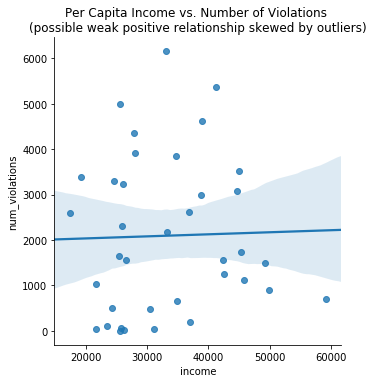

In [16]:
sns.lmplot(x='income', y='num_violations', data=df, fit_reg=True)
plt.title('Per Capita Income vs. Number of Violations \n(possible weak positive relationship skewed by outliers)')

Text(0.5, 1, 'Percentage of Families Below Poverty Line vs. Number of Violations\n (possible positive correlation skewed by outliers)')

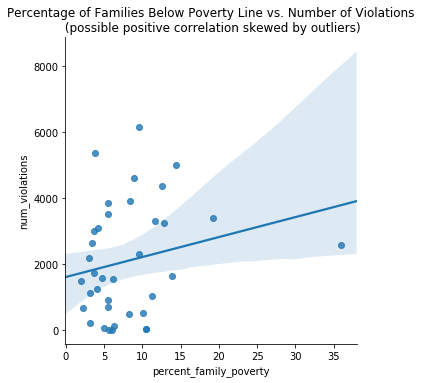

In [17]:
sns.lmplot(x='percent_family_poverty', y='num_violations', data=df, fit_reg=True)
plt.title('Percentage of Families Below Poverty Line vs. Number of Violations' 
          '\n (possible positive correlation skewed by outliers)')

Text(0.5, 1, 'Percentage of Non-White Familes vs. Number of Violations \n (possible positive relationship skewed by outliers)')

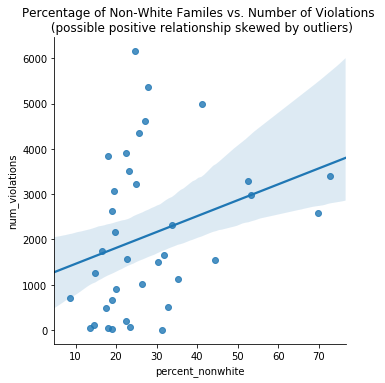

In [18]:
sns.lmplot(x='percent_nonwhite', y='num_violations', data=df, fit_reg=True)
plt.title('Percentage of Non-White Familes vs. Number of Violations \n (possible positive relationship skewed by outliers)')

Since the scatterplots above seem extremely skewed from outliers, I decided to perform a log transformation of the data to decrease the skew.

In [19]:
df['income10'] = np.log10(df['income'])
df['percent_family_poverty10'] = np.log10(df['percent_family_poverty'])
df['percent_nonwhite10'] = np.log10(df['percent_nonwhite'])
df['num_violations10'] = np.log10(df['num_violations'])

In [20]:
df.head()

,zip,income,percent_family_poverty,percent_nonwhite,num_violations,income10,percent_family_poverty10,percent_nonwhite10,num_violations10
0,27501,21631,10.5,17.9,43,4.335077,1.021189,1.252853,1.633468
1,27502,36763,3.4,18.9,2624,4.565411,0.531479,1.276462,3.418964
2,27511,33139,9.6,24.8,6152,4.520339,0.982271,1.394452,3.789016
3,27513,41232,3.8,27.8,5371,4.615234,0.579784,1.444045,3.730055
4,27518,49865,5.5,19.9,907,4.697796,0.740363,1.298853,2.957607


Then, I plotted the Log10 of each value vs. Log10 of <code>num_violations</code>.

Text(0.5, 1, 'Log10 of Income vs. Log10 of Number of Violations \n (positive relationship skewed by outliers)')

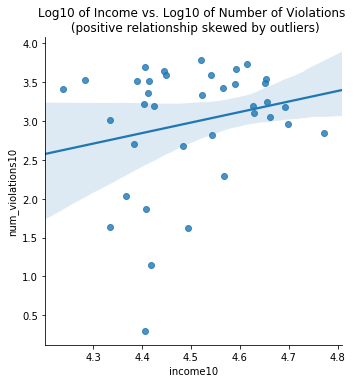

In [21]:
sns.lmplot(x='income10', y='num_violations10', data=df, fit_reg=True)
plt.title('Log10 of Income vs. Log10 of Number of Violations \n (positive relationship skewed by outliers)')

Text(0.5, 1, 'Log10 of Percent of Families Below Poverty Line vs. Log10 of Number of Violations \n (positive relationship skewed by outliers)')

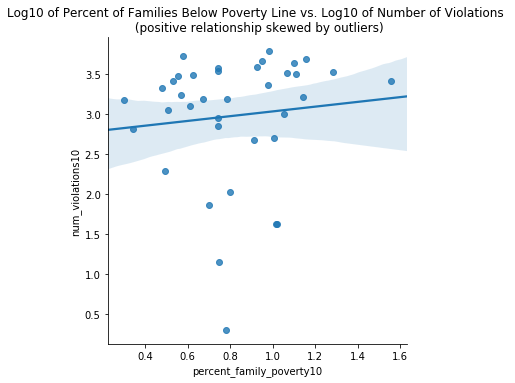

In [22]:
sns.lmplot(x='percent_family_poverty10', y='num_violations10', data=df, fit_reg=True)
plt.title('Log10 of Percent of Families Below Poverty Line vs. Log10 of Number of Violations \n (positive relationship skewed by outliers)')

Text(0.5, 1, 'Log10 of Percent of Non-White Population vs. Log10 of Number of Violations \n (positive relationship skewed by outlers)')

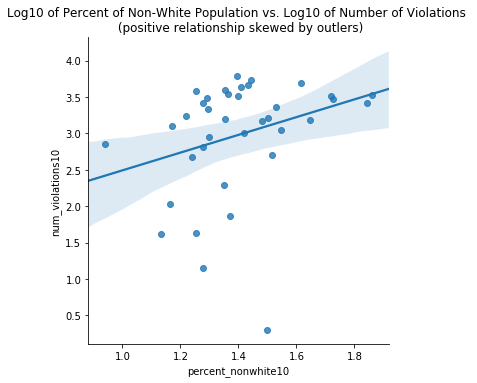

In [23]:
sns.lmplot(x='percent_nonwhite10', y='num_violations10', data=df, fit_reg=True)
plt.title('Log10 of Percent of Non-White Population vs. Log10 of Number of Violations \n (positive relationship skewed by outlers)')

In [24]:
df.corr()

,income,percent_family_poverty,percent_nonwhite,num_violations,income10,percent_family_poverty10,percent_nonwhite10,num_violations10
income,1.000000,-0.612539,-0.438987,0.026262,0.988230,-0.680136,-0.461802,0.217930
percent_family_poverty,-0.612539,1.000000,0.638936,0.218597,-0.686295,0.901546,0.540391,0.160210
percent_nonwhite,-0.438987,0.638936,1.000000,0.297442,-0.488648,0.488267,0.956961,0.283414
num_violations,0.026262,0.218597,0.297442,1.000000,0.053597,0.244226,0.348612,0.781011
income10,0.988230,-0.686295,-0.488648,0.053597,1.000000,-0.731824,-0.482441,0.219550
percent_family_poverty10,-0.680136,0.901546,0.488267,0.244226,-0.731824,1.000000,0.423926,0.102091
percent_nonwhite10,-0.461802,0.540391,0.956961,0.348612,-0.482441,0.423926,1.000000,0.299365
num_violations10,0.217930,0.160210,0.283414,0.781011,0.219550,0.102091,0.299365,1.000000


From the above cell, we can see that income, percentage of families under the poverty linie, and the percentage of non-white citizens all show a weak positive relationship with the number of restaurant violations. After checking the correlation coefficient, I then used <code>patsy.dmatrices</code> to perform an OLS regression to make a linear model of these data.

In [25]:
outcome, predictors = patsy.dmatrices('num_violations10 ~ income10 + percent_family_poverty10 + percent_nonwhite10', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       num_violations10   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     6.549
Date:                Wed, 10 Jun 2020   Prob (F-statistic):            0.00135
Time:                        22:34:11   Log-Likelihood:                -35.066
No. Observations:                  37   AIC:                             78.13
Df Residuals:                      33   BIC:                             84.58
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

After observing the OLS regression results, we can see that the R-squared value is 0.373, meaning that 37.3% of the variability in the number of health code violations can be explained through the per capita income of a zipcode, the percent of families below the poverty line, and the percentage of non-white people in that zip code.

We can also conclude that the socioeconomic location of a restaurant can predict the number of healthcode violations that a restaurant in those locations may receive. This is because the p-value for all three variables is less than 0.05 (which I determined in my hypothesis that any p-value less than 0.05 is statistically significant), therefore I can reject the null hypothesis.

# Ethics & Privacy

Because these data are all public domain, and are not referring to human subjects, informed consent was not required to collect these data. I decided to include the full zip code of the violations because these data do not refer to human subjects. It would also be nearly impossible to perform my analysis with the Safe Harbor Method masking the last 3 digits of the zip code because it would jumble all of the zip codes together. However, since privacy is an issue, I intentionally dropped all of the columns that could potentially lead to a privacy breach which luckily were not needed for my analysis.

I made sure to only use the columns <code>hsisid</code> and <code>violationtype</code> from the violations csv file, <code>hsisid</code> and <code>postalcode</code> from the restaurants csv file, and <code>zip</code>, <code>per_capita_income_dollars</code>, <code>percent_damilies_below_poverty_line</code>, and <code>percent_nonwhite</code> from the zipcodes csv file because I found the other columns irrelevant to my analysis. It does not include any other information about who performed the violation, restaurant names, or telephone numbers associated with those restaurants.

Some possible unintended consequences of this project could be that people could see the possibility of contracting foodborne illnesses (FBIs) due to the poorer locations showing an increase in healthcode violations. This may result in less business for the zip codes showing an increase in healthcode violations. Another unintended consequence that should be addressed could be the possibility of people thinking that in zip codes with a greater population of non-white residents have a greater chance of healthcode violations, and therefore avoiding more colored areas on purpose. 

# Conclusion & Discussion

Ultimately, after the analysis performed, I believe that I can reject the null hypothesis. I predicted that some socioeconomic characteristics of zip codes in Wake County, NC contribute to the number of health code violations that a restaurant in said zip codes recieve. Both graphs <code>percent_family_poverty</code> vs <code>num_violations</code> and <code>percent_nonwhite</code> vs <code>num_violations</code> support the possibility that the more poor an area is, the greater the likelihood of a health code violation due to the lack of financial resources available to allocate to health regulations. I used an alpha value of 0.05, and after the OLS linear model all three <code>P>|t|</code> values were less than my original alpha, thus showing that there are statistically significant relationships between the three varaibles and the number of health code violations. Thus, I can confidently say that I can reject my null hypothesis.

One of the more interesting finds, however, is how <code>income</code> vs <code>num_violations</code> has a weak positive relationship. I would assume that the less money per capita per zip code would contribute to more health code violations. However, after switching my theory, it makes more sense. This could be possible because the richer zip codes could have more restaurants. The more restaurants, the more likely a health code violation could occur. This could also mean that the poorer areas in Wake County, NC have a smaller amount of restaurants.

Some limitations of this project include that the datasets are extremely confined to Wake County, NC which likely will not apply across the entire United States or the world. Ideally, I would have datasets of the entire United States. The socioeconomic characteristics of Wake County probably do not reflect the same socioeconomic characteristics of the United States as a whole. Another limitation could be, as I said in my <strong>Background and Prior Work</strong> section, the number of variables I have analyzed. Since my R-squared value was only .373, I am clearly not getting the entire picture. One variable that could be important to analyze could be whether a restaurant is in a chain or not, for restaurants in a chain could possibly have stricter health codes than those that are not.

Finally, I want to acknowledge the impact that this research could have. Besides the possible unintended consequences outlined above, this could lead to a discussion on the intentional or unintentional systematic racism in this country, or at least Wake County, NC. Since colored people are statistically more likely to be poorer and get fewer opportunities than the average white person, it is possible that this research could uncover the class and socioeconomic issues in the United States. Since the murder of George Floyd, the entire country is in a state of unrest and this research could add fuel to the fire.